In [1]:
%matplotlib notebook
import processmcrat as pm
import astropy.units as unit
from astropy import constants as const
import matplotlib.pyplot as plt
import numpy as np

'''
Plotting spectra and peak energies vs refinement level for final frame in spherical outflow simulation
'''

In [2]:
mcrat_sim1=pm.McratSimLoad(
    "/Users/josearita-escalante/Documents/GRB-NASA/MCRaT-gits/Hydro-Sim/PLUTO/mcrat/spherical-outflow/3000-8000-photons/final-conditions-res-levs/1/") 
mcrat_sim1.load_frame(2638, read_stokes=False)
observation1=pm.MockObservation(1, 4, 1e14, 5, mcratsimload_obj=mcrat_sim1)
observation1.set_spectral_fit_parameters()
spectrum_dict1=observation1.spectrum(observation1.detected_photons.detection_time.min()-1, 
                                     observation1.detected_photons.detection_time.max()+1,
                                     spectrum_unit=unit.count/unit.s/unit.keV, 
                                     fit_spectrum=True,sample_num=1e4)

mcrat_sim2=pm.McratSimLoad(
    "/Users/josearita-escalante/Documents/GRB-NASA/MCRaT-gits/MCRaT-resolution/CHOMBO/spherical-outflow/3000-8000-photons/final-conditions-res-levs/2/") 
mcrat_sim2.load_frame(2638, read_stokes=False)
observation2=pm.MockObservation(1, 4, 1e14, 5, mcratsimload_obj=mcrat_sim2)
observation2.set_spectral_fit_parameters()
spectrum_dict2=observation2.spectrum(observation2.detected_photons.detection_time.min()-1, 
                                     observation2.detected_photons.detection_time.max()+1, 
                                     spectrum_unit=unit.count/unit.s/unit.keV, 
                                     fit_spectrum=True,sample_num=1e4)
mcrat_sim3=pm.McratSimLoad(
    "/Users/josearita-escalante/Documents/GRB-NASA/MCRaT-gits/MCRaT-resolution/CHOMBO/spherical-outflow/3000-8000-photons/final-conditions-res-levs/3/") 
mcrat_sim3.load_frame(2638, read_stokes=False)
observation3=pm.MockObservation(1, 4, 1e14, 5, mcratsimload_obj=mcrat_sim3)
observation3.set_spectral_fit_parameters()
spectrum_dict3=observation3.spectrum(observation3.detected_photons.detection_time.min()-1, 
                                     observation3.detected_photons.detection_time.max()+1,
                                     spectrum_unit=unit.count/unit.s/unit.keV, 
                                     fit_spectrum=True,sample_num=1e4)

mcrat_sim4=pm.McratSimLoad(
    "/Users/josearita-escalante/Documents/GRB-NASA/MCRaT-gits/MCRaT-resolution/CHOMBO/spherical-outflow/3000-8000-photons/final-conditions-res-levs/4/") 
mcrat_sim4.load_frame(2638, read_stokes=False)
observation4=pm.MockObservation(1, 4, 1e14, 5, mcratsimload_obj=mcrat_sim4)
observation4.set_spectral_fit_parameters()
spectrum_dict4=observation4.spectrum(observation4.detected_photons.detection_time.min()-1, 
                                     observation4.detected_photons.detection_time.max()+1,
                                     spectrum_unit=unit.count/unit.s/unit.keV, 
                                     fit_spectrum=True,sample_num=1e4)

mcrat_sim5=pm.McratSimLoad(
    "/Users/josearita-escalante/Documents/GRB-NASA/MCRaT-gits/MCRaT-resolution/CHOMBO/spherical-outflow/3000-8000-photons/final-conditions-res-levs/5/") 
mcrat_sim5.load_frame(2638, read_stokes=False)
observation5=pm.MockObservation(1, 4, 1e14, 5, mcratsimload_obj=mcrat_sim5)
observation5.set_spectral_fit_parameters()
spectrum_dict5=observation5.spectrum(observation5.detected_photons.detection_time.min()-1, 
                                     observation5.detected_photons.detection_time.max()+1,
                                     spectrum_unit=unit.count/unit.s/unit.keV, 
                                     fit_spectrum=True,sample_num=1e4)

/Users/josearita-escalante/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/josearita-escalante/opt/anaconda3/lib/python3.8/site-packages/processmcrat/mclib.py:41: RuntimeWarning: invalid value encountered in double_scalars
  model[kk]=((alpha-beta)*break_energy)**(alpha-beta)*energies[kk]**(beta)*np.exp(beta-alpha)
/Users/josearita-escalante/opt/anaconda3/lib/python3.8/site-packages/processmcrat/mclib.py:86: RuntimeWarning: overflow encountered in exp
  model=(energies**alpha)*np.exp(-energies/break_energy)
/Users/josearita-escalante/opt/anaconda3/lib/python3.8/site-packages/processmcrat/mclib.py:87: RuntimeWarning: invalid value encountered in true_divide
  model=model/np.trapz(model,x=energies)*normalization


<IPython.core.display.Javascript object>


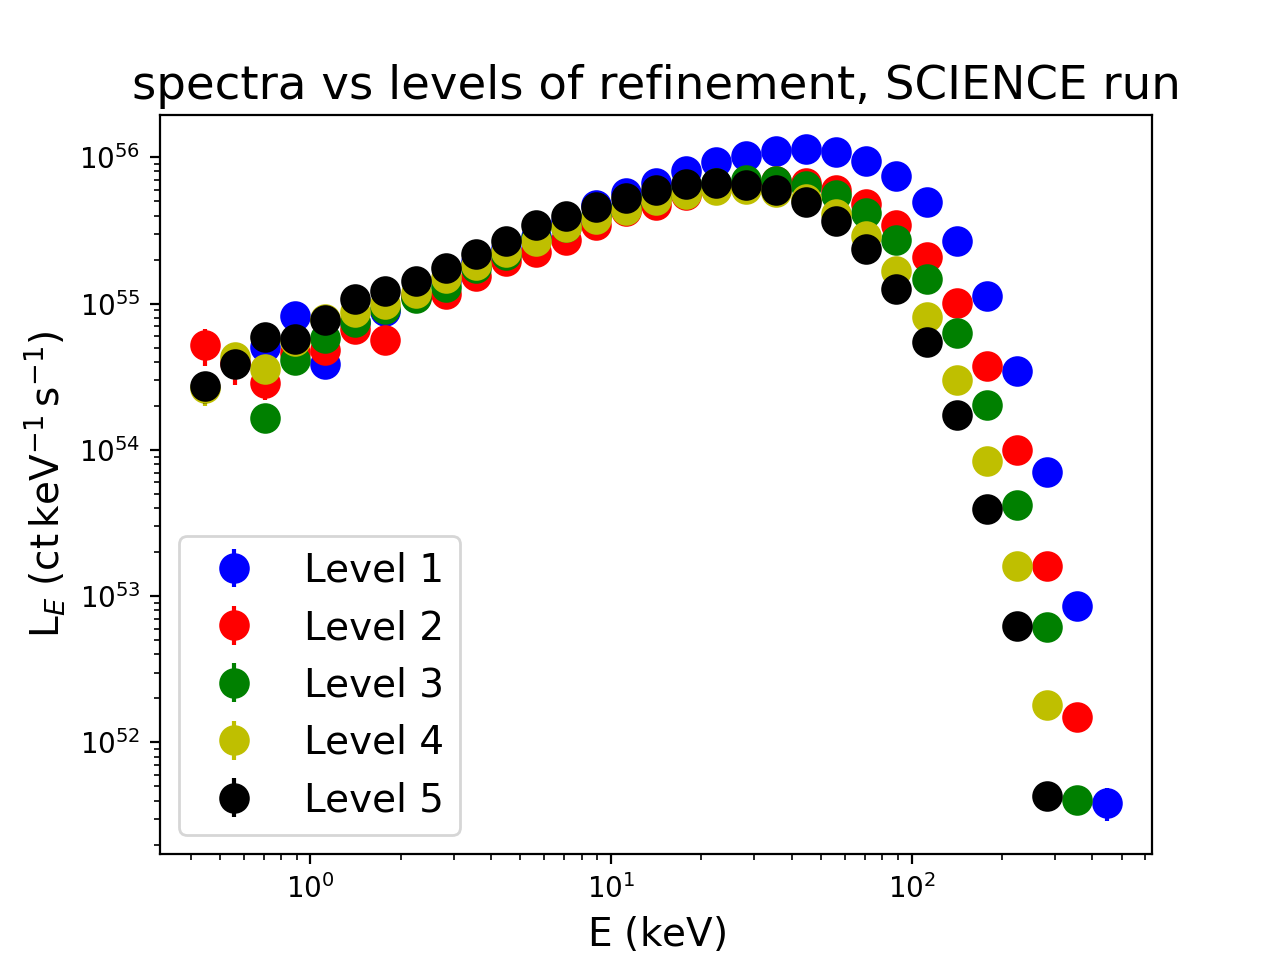

In [3]:
photon_num_min=10

f, axarr = plt.subplots(1, sharex=True)
axarr_spex = axarr
 
plt.rcParams.update({'font.size': 14})

levs=[1,2,3,4,5]

colors=['b','r','g','y','k']

spectrum_dict_list=[spectrum_dict1, spectrum_dict2, spectrum_dict3, spectrum_dict4, spectrum_dict5]

idx_list=[]

for i in spectrum_dict_list:
    idx_list.append(np.where(i['ph_num']>photon_num_min)[0])


axarr_spex.loglog(spectrum_dict_list[0]['energy_bin_center'][idx_list[0]], 
                  spectrum_dict_list[0]['spectrum'][idx_list[0]], colors[0]+".")
axarr_spex.errorbar(spectrum_dict_list[0]['energy_bin_center'][idx_list[0]], 
                    spectrum_dict_list[0]['spectrum'][idx_list[0]],\
                    yerr=spectrum_dict_list[0]['spectrum_errors'][idx_list[0]], 
                    color=colors[0], marker='o', ls='None', 
                    markersize=10, label='Level 1')

axarr_spex.set_xlabel(r'E' + ' ('+spectrum_dict_list[0]['energy_bin_center'].unit.to_string('latex_inline')+')', 
                                  fontsize=14)
axarr_spex.set_ylabel(r'L$_E$ ('+spectrum_dict_list[0]['spectrum'][idx_list[0]].unit.to_string('latex_inline')+')', 
                                  fontsize=14)

axarr_spex.loglog(spectrum_dict_list[1]['energy_bin_center'][idx_list[1]], 
                  spectrum_dict_list[1]['spectrum'][idx_list[1]], colors[1]+".")
axarr_spex.errorbar(spectrum_dict_list[1]['energy_bin_center'][idx_list[1]], 
                    spectrum_dict_list[1]['spectrum'][idx_list[1]],\
                    yerr=spectrum_dict_list[1]['spectrum_errors'][idx_list[1]], 
                    color=colors[1], marker='o', ls='None', 
                    markersize=10, label='Level 2')

axarr_spex.loglog(spectrum_dict_list[2]['energy_bin_center'][idx_list[2]], 
                  spectrum_dict_list[2]['spectrum'][idx_list[2]], colors[2]+".")
axarr_spex.errorbar(spectrum_dict_list[2]['energy_bin_center'][idx_list[2]], 
                    spectrum_dict_list[2]['spectrum'][idx_list[2]],\
                    yerr=spectrum_dict_list[2]['spectrum_errors'][idx_list[2]], 
                    color=colors[2], marker='o', ls='None', 
                    markersize=10, label='Level 3')

axarr_spex.loglog(spectrum_dict_list[3]['energy_bin_center'][idx_list[3]], 
                  spectrum_dict_list[3]['spectrum'][idx_list[3]], colors[3]+".")
axarr_spex.errorbar(spectrum_dict_list[3]['energy_bin_center'][idx_list[3]], 
                    spectrum_dict_list[3]['spectrum'][idx_list[3]],\
                    yerr=spectrum_dict_list[3]['spectrum_errors'][idx_list[3]], 
                    color=colors[3], marker='o', ls='None', 
                    markersize=10, label='Level 4')

axarr_spex.loglog(spectrum_dict_list[4]['energy_bin_center'][idx_list[4]], 
                  spectrum_dict_list[4]['spectrum'][idx_list[4]], colors[4]+".")
axarr_spex.errorbar(spectrum_dict_list[4]['energy_bin_center'][idx_list[4]], 
                    spectrum_dict_list[4]['spectrum'][idx_list[4]],\
                    yerr=spectrum_dict_list[4]['spectrum_errors'][idx_list[4]], 
                    color=colors[4], marker='o', ls='None', 
                    markersize=10, label='Level 5')


axarr_spex.legend()

plt.title("spectra vs levels of refinement, SCIENCE run")
plt.show()

In [4]:
peak_e, peak_e_err = pm.calc_epk_error(spectrum_dict2['fit']['alpha'], spectrum_dict2['fit']['break_energy'],\
                                        alpha_error=spectrum_dict2['fit_errors']['alpha_errors'],\
                                        break_energy_error=spectrum_dict2['fit_errors']['break_energy_errors'])
print(peak_e, peak_e_err)



94.04219876721687 keV 0.2629216167405385 keV


In [5]:
e_pk=[]
e_pk_err=[]

for i in range(len(levs)):
    #print(spectrum_dict_list[i])
    peak_e, peak_e_err = pm.calc_epk_error(spectrum_dict_list[i]['fit']['alpha'], 
                                        spectrum_dict_list[i]['fit']['break_energy'],\
                                        alpha_error=spectrum_dict_list[i]['fit_errors']['alpha_errors'],\
                                        break_energy_error=
                                           spectrum_dict_list[i]['fit_errors']['break_energy_errors'])
    e_pk.append(peak_e)
    e_pk_err.append(peak_e_err)
    
print(e_pk)
print(e_pk_err)

[<Quantity 106.28297186 keV>, <Quantity 94.04219877 keV>, <Quantity 83.18086386 keV>, <Quantity 73.42057435 keV>, <Quantity 65.01086115 keV>]
[<Quantity 0.311098 keV>, <Quantity 0.26292162 keV>, <Quantity 0.24800067 keV>, <Quantity 0.26619707 keV>, <Quantity 0.24677045 keV>]


<IPython.core.display.Javascript object>


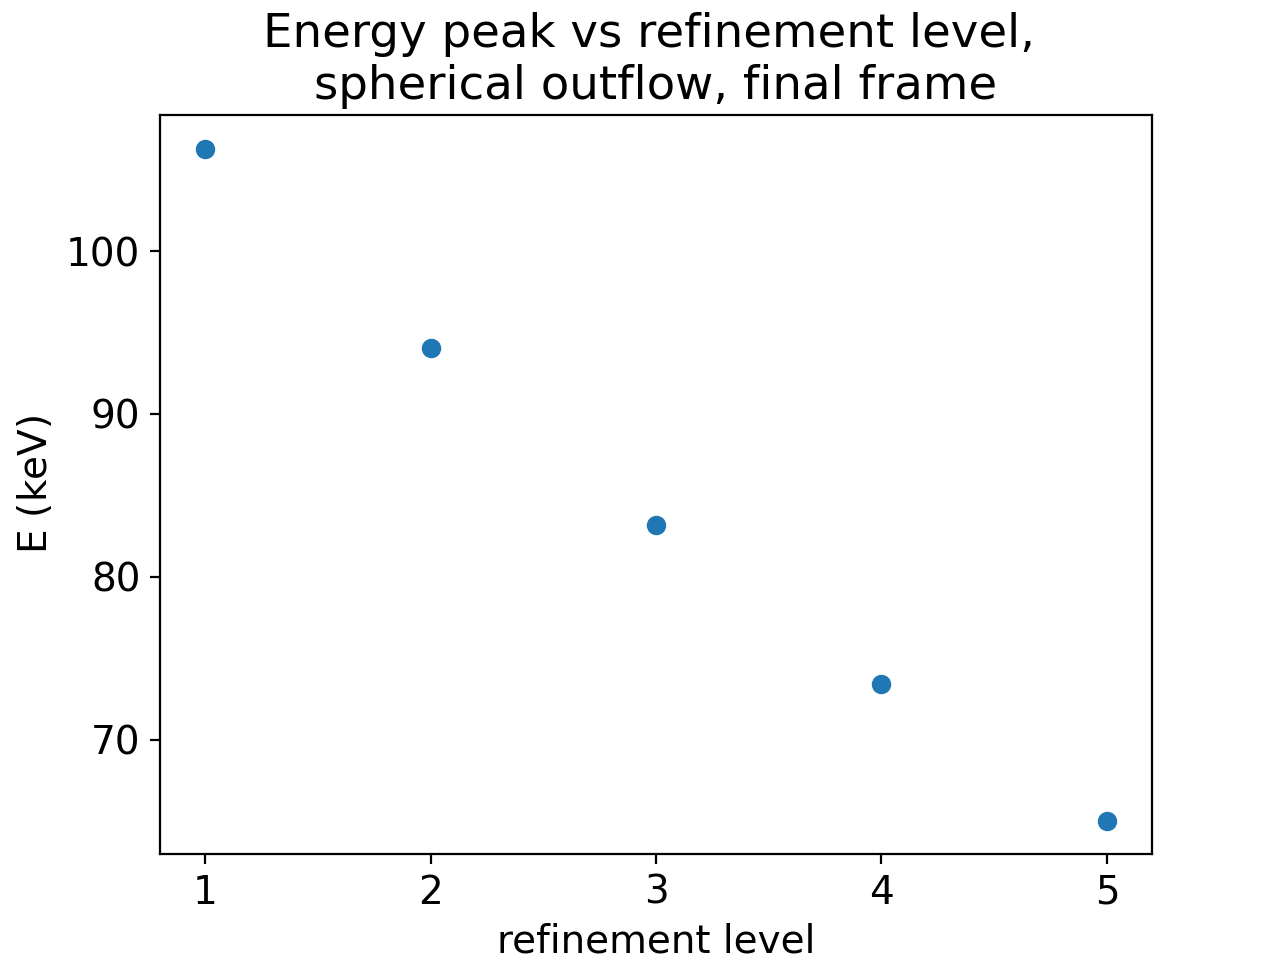

In [6]:
characters=[' ','k','e','V']
for i in range(len(e_pk)):
    for j in characters:
        e_pk[i]=str(e_pk[i]).replace(j,'')
        e_pk_err[i]=str(e_pk_err[i]).replace(j,'')
    e_pk[i]=float(e_pk[i])
    e_pk_err[i]=float(e_pk_err[i])
    
plt.scatter(levs,e_pk)
plt.title('''Energy peak vs refinement level, 
spherical outflow, final frame''')
plt.ylabel(r'E' + ' ('+spectrum_dict_list[0]['energy_bin_center'].unit.to_string('latex_inline')+')', 
                                  fontsize=14)
plt.xlabel("refinement level")
plt.show()

In [14]:
np.sqrt(spectrum_dict1['spectrum']*spectrum_dict1['spectrum_errors'])

<Quantity [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00